# Mushroom Project

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

Importing all the necessary Libraries

In [80]:
df=pd.read_csv('Mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Loading the Dataset in DataFrame and printing the First Five Rows

In [81]:
df.shape

(8124, 23)

This Shows the number of rows=8124 and columns=23

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

This shows the Information of the dataset. Here the Data Type is Showing as Object

In [83]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

This shows the Number of count where Value s Null.It does not have any Null Value.

<AxesSubplot:>

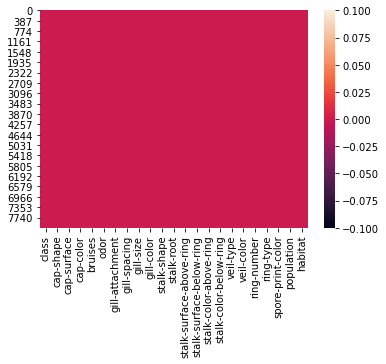

In [84]:
sns.heatmap(df.isnull())

This Heat Map is used to identify Null Value. It does not have any Null Value.

In [85]:
df['class'].unique()

array(['p', 'e'], dtype=object)

This Dataset show Class Having p=Poisionous and e=Edible Type.

In [86]:
count=df['class'].value_counts()
count

e    4208
p    3916
Name: class, dtype: int64

It shows Edible Type=4208 and Poisonous Type= 3916 Total=e+p=8124

In [87]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


This show the Column-wise Data such as Number Count,Unique Values, Most Frequently occuring, and Frequency.

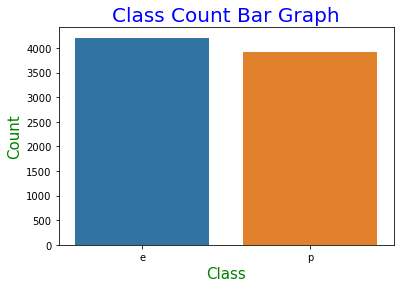

In [88]:
sns.barplot(x=count.index,y=count.values)
plt.xlabel('Class',color='green',fontsize=15)
plt.ylabel('Count',color='green',fontsize=15)
plt.title('Class Count Bar Graph', color = 'blue', fontsize = 20)
plt.show()

This Bar Plot shows the Count of Edible and Poisonous Mushroom. The both bars are almost same height.

# Label Encoder

Since the values in the Datasets are in Object, we use Label Encoder so that all the objects can be converted into a number.

In [89]:
lenc=LabelEncoder()
for column in df.columns:
    df[column]=lenc.fit_transform(df[column])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Here Converting the Data set into the numbers and checking the values.

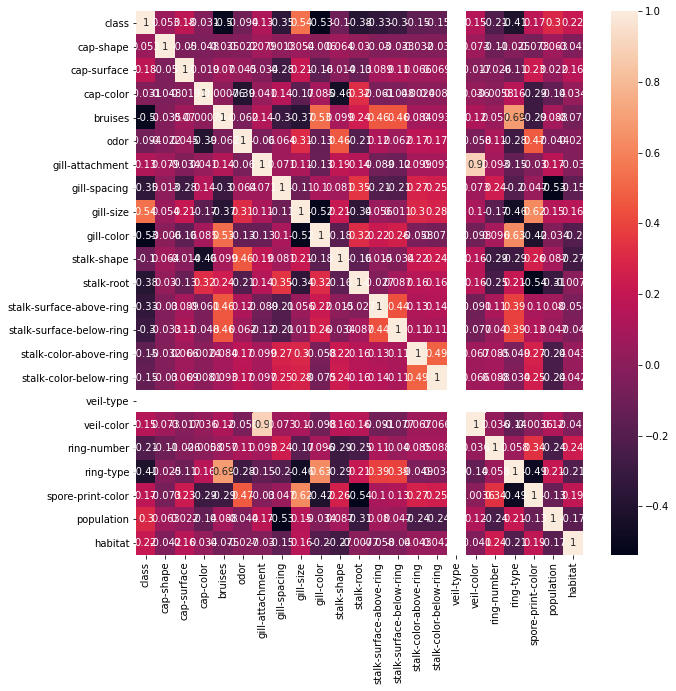

In [91]:
corhmap=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corhmap,annot=True)
plt.show()

This shows the Corelation Heat Map with one Column to another. Here we can see Column 'veil-type' has only Zero values. Hence it need to be drop.

In [ ]:
df=df.drop(['veil-type'],axis=1)

Droping the veil-type columns

In [137]:
df.shape

(8124, 22)

Now the Dataset is showing 22 Columns insted of 23 column shown before.

# 1. Logistic Regression

Here we use Logistic Regression to Predict the Outcome of Class wheather it is Edible or Poisonnous

In [124]:
x=df.drop(['class'],axis=1)
y1=df['class'].to_numpy()
y.shape
y1=y1.reshape(-1,1)
y=pd.DataFrame(y1)
y

,0
0,1
1,0
2,0
3,1
4,0
...,...
8119,0
8120,0
8121,0
8122,1


Here we determine x and y for the Prediction of Class. Since Class is an output we drop Class from x and assign to y.

In [138]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=40)

Here we use 80% data for Training and 20% for Test

In [126]:
train_y.shape

(6499, 1)

Shows 6499 rows and 1 column has been used in training of y

In [127]:
train_x.shape

(6499, 21)

Shows 6499 rows and 21 column has been used in training of x

In [129]:
lg=LogisticRegression()
lg.fit(train_x,train_y)

LogisticRegression()

Using Logistic Regression for Training of x and y

In [130]:
pred=lg.predict(test_x)
print(pred)

[0 1 1 ... 1 0 1]


Shows Predition of x using Logistic Regression

In [147]:
print('accuracy_score',accuracy_score(test_y,pred))
print('Confusion Martix',confusion_matrix(test_y,pred))
print('Classification Report', classification_report(test_y,pred))

accuracy_score 0.9575384615384616
Confusion Martix [[810  32]
 [ 37 746]]
Classification Report               precision    recall  f1-score   support

           0       0.96      0.96      0.96       842
           1       0.96      0.95      0.96       783

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



It shows the Accuracy of 95% using Logistic Regression

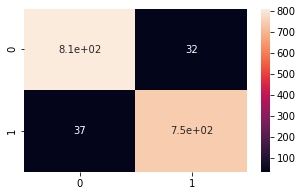

In [158]:
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(test_y,pred),annot=True)
plt.show()

In [ ]:
Heat Map of Confusion Matrix

# 2. Decision Tree Classifier

In [140]:
from sklearn.tree import DecisionTreeClassifier

In [142]:
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
preddtc=dtc.predict(test_x)
print(accuracy_score(test_y,preddtc))
print(confusion_matrix(test_y,preddtc))
print(classification_report(test_y,preddtc))

1.0
[[842   0]
 [  0 783]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Here we can see that Accuracy is 100%

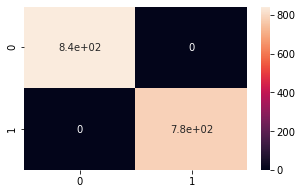

In [157]:
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(test_y,preddtc),annot=True)
plt.show()

In [ ]:
Heat Map of Confusion Matrix

# 3. MultinomialNB

In [145]:
from sklearn.naive_bayes import MultinomialNB

In [146]:
mnb=MultinomialNB()
mnb.fit(train_x,train_y)
predmnb=mnb.predict(test_x)
print(accuracy_score(test_y,predmnb))
print(confusion_matrix(test_y,predmnb))
print(classification_report(test_y,predmnb))

0.8092307692307692
[[783  59]
 [251 532]]
              precision    recall  f1-score   support

           0       0.76      0.93      0.83       842
           1       0.90      0.68      0.77       783

    accuracy                           0.81      1625
   macro avg       0.83      0.80      0.80      1625
weighted avg       0.83      0.81      0.81      1625



In [ ]:
Here we can see accuracy of 81%

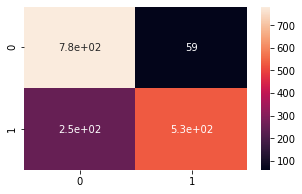

In [156]:
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(test_y,predmnb),annot=True)
plt.show()

Heat Map of Confusion Matrix

# 4. K-Neighbor Classifier

In [148]:
from sklearn.neighbors import KNeighborsClassifier

In [149]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(train_x,train_y)
knn.score(train_x,train_y)
predknn=knn.predict(test_x)
print(accuracy_score(test_y,predknn))
print(confusion_matrix(test_y,predknn))
print(classification_report(test_y,predknn))

0.9987692307692307
[[842   0]
 [  2 781]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
Here the accuracy is 99.88%

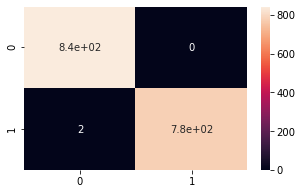

In [155]:
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(test_y,predknn),annot=True)
plt.show()

Heat Map of Confusion Matrix

# Conclusion

Out of the Four above Models
Decision Tree Classifier has the best model as its accuracy is 100%